<a href="https://colab.research.google.com/github/DuncanFerguson/GITHUB_REPOSITORY/blob/main/Project_1_Duncan_Ferguson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [90]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Import Strings
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.utils import resample
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


# Experiment Objective


## Describe the data set that is being analyzed. Including the TOS (Terms of Service) and ethical considerations
- Lecture 07 Data Science Ethics, and Building Good Training Datasets with Data Preprocessing

The Data set that is being examined is from the University of Calironia - Irvine's Machine Learning repository. I looked at a few other datasets from the U.S. Census, SNOTEL, and various Employement Statistics. This data set seemed the most revelant to my current job. It is a little lighter on the extractaion method which should led me more time to focuse on machine learning aspects of the project. 

When looking at the "READ ME" of this data set it is cited that the data set is available for research, but should include the following citation.

  [Moro et al., 2011] S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. 
  In P. Novais et al. (Eds.), Proceedings of the European Simulation and Modelling Conference - ESM'2011, pp. 117-121, Guimarães, Portugal, October, 2011. EUROSIS.

  Available at: http://www3.dsi.uminho.pt/pcortez/bib/2011-esm-1.txt
"


- What am I attempting to model?

With the dataset that I have selected, I am attempting to predict if a client has subscribed to a term deposit. More importantly, if a campaign was successfull in helpful in determing that the client dubscribed.

- Why did I choose the training examples I did for training the model

There were a few things in the data set that needed to be remove before more extensive feature selection could be conducted. The first point is selecting clients that have not been contacted before for a campaign. This means we have to scrub out any data points that do not have pday = -1 or previous > 0. Because we do not which campaigns the clients were a part of previously contacted people offer an opportunity to sckew the data. There could be some clients that were contacted by a certain campaign while other were not contacted by the same one. By removing these clients we remove this potential source of bias

## Experiment Objective: 
- Did a client subscribe a term deposit.
- What are the significant factors in determining if a client is subscribed to a term deposit



# Data Collection


### Write the Necessary Python code to retrieve and store the training examples that are to be used in the model
- Am I accessing an API / Scraping a website? Downloading an archive?

The Data is being downloaded directly from an archive

- Implementation goes in this section. 

Code implementation is below

- Result of this section should be an in-memory panda DF

The Dataframe is shown a few times. At first the raw head of the data frame is displayed. Then a few statistics are shown. After that feature selection is conducted and reduced down until there is a sutaible dataset to build the model upon.

- Note the data must have at least five different features , and at least two unique class labels

There are 16 different features to start with this gets boiled down as the project goes on. Which will be listed below in the code. The Classification label is either "Yes" or "No". Leaving use with two unique classification labels. 


In [91]:
# Grabbing the website
!wget 'banking_data' 'https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip'

--2022-07-24 21:23:34--  http://banking_data/
Resolving banking_data (banking_data)... failed: Name or service not known.
wget: unable to resolve host address ‘banking_data’
--2022-07-24 21:23:34--  https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 579043 (565K) [application/x-httpd-php]
Saving to: ‘bank.zip.1’

bank.zip.1          100%[===================>] 565.47K  2.16MB/s    in 0.3s    

2022-07-24 21:23:35 (2.16 MB/s) - ‘bank.zip.1’ saved [579043/579043]

FINISHED --2022-07-24 21:23:35--
Total wall clock time: 0.7s
Downloaded: 1 files, 565K in 0.3s (2.16 MB/s)


In [92]:
# Unzipping the file
!unzip -o 'bank.zip'

Archive:  bank.zip
  inflating: bank-full.csv           
  inflating: bank-names.txt          
  inflating: bank.csv                


In [93]:
# Downloading the Excel file and reading in the second sheet
df = pd.read_csv('bank-full.csv', sep=';')

In [94]:
# Filtering out clients that have been contacted by previous campaigns
df = df.loc[(df['pdays'] == -1) & (df['previous'] == 0)]

# Dropping out these two columns because they are no longer needed
df = df.drop(labels=['pdays','previous'], axis=1)

In [95]:
# Displaying the Head of the Data
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,unknown,no


In [96]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'poutcome',
       'y'],
      dtype='object')

In [97]:
df.shape

(36954, 15)

Before we get started looking into the different types of stats of the 

In [98]:
# Giving the descriptive metrics
display(df.describe())


,age,balance,day,duration,campaign
count,36954.000000,36954.000000,36954.000000,36954.000000,36954.000000
mean,40.932430,1318.788846,16.145424,257.726119,2.921957
std,10.430218,3039.557077,8.372554,262.256406,3.325791
min,18.000000,-8019.000000,1.000000,0.000000,1.000000
25%,33.000000,55.000000,9.000000,101.000000,1.000000
50%,39.000000,414.000000,17.000000,177.000000,2.000000
75%,49.000000,1358.000000,22.000000,318.000000,3.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000


In [99]:
# Displaying Info $ and DTypes and counts
display(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36954 entries, 0 to 45209
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        36954 non-null  int64 
 1   job        36954 non-null  object
 2   marital    36954 non-null  object
 3   education  36954 non-null  object
 4   default    36954 non-null  object
 5   balance    36954 non-null  int64 
 6   housing    36954 non-null  object
 7   loan       36954 non-null  object
 8   contact    36954 non-null  object
 9   day        36954 non-null  int64 
 10  month      36954 non-null  object
 11  duration   36954 non-null  int64 
 12  campaign   36954 non-null  int64 
 13  poutcome   36954 non-null  object
 14  y          36954 non-null  object
dtypes: int64(5), object(10)
memory usage: 4.5+ MB


None

While on the face, It looks like there are no missing values. This is not quite true. They have been entries marked as unknown. For this reason we will change them to make them more visable and easier to handle.

In [100]:
# Replacing all the Unknown values with Nan
df.replace('unknown', np.nan, inplace=True)

# Displaying the count of the NaN's in the dataframe
df.isna().sum()

age              0
job            255
marital          0
education     1534
default          0
balance          0
housing          0
loan             0
contact      12950
day              0
month            0
duration         0
campaign         0
poutcome     36954
y                0
dtype: int64

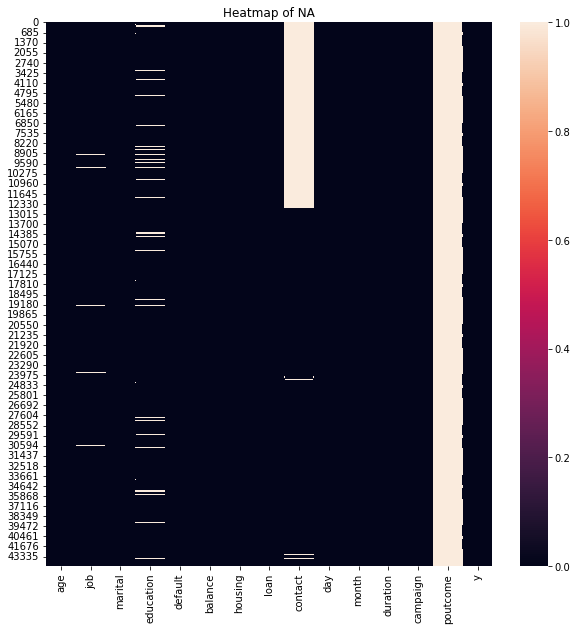

In [101]:
# Displaying the new NaNs on a heatmap
plt.figure(figsize=(10,10))
sns.heatmap(df.isna())
plt.title('Heatmap of NA')
plt.show()

In [102]:
missing_col_per = pd.DataFrame([(df[col].isnull().sum()/df.shape[0]) for col in df.columns] , df.columns, columns=['Percent_Missing'])
missing_col_per

,Percent_Missing
age,0.000000
job,0.006900
marital,0.000000
education,0.041511
default,0.000000
balance,0.000000
housing,0.000000
loan,0.000000
contact,0.350436
day,0.000000


Since we removed all the clients that had been placed in a campaign before we now get 100% of the Poutcome column as unknown. Meaning that this column should be dropped. Below we set up the threshold for dropping a column as over 80% missing. This will end up taking contact and poutcome out of the equation.

In [103]:
# Setting the limit for dropping
drop_lim = df.shape[0] * .8
df_1 = df.dropna(thresh=drop_lim, axis=1)

In [104]:
# Displaying the New Columns to be used
df_1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'day', 'month', 'duration', 'campaign', 'y'],
      dtype='object')

In [105]:
# Displaying the count of the NaN's in the dataframe
df_1.isna().sum()

age             0
job           255
marital         0
education    1534
default         0
balance         0
housing         0
loan            0
day             0
month           0
duration        0
campaign        0
y               0
dtype: int64

In [106]:
# Showing the number of unique values
df_1.nunique()

age            76
job            11
marital         3
education       3
default         2
balance      7058
housing         2
loan            2
day            31
month          12
duration     1525
campaign       48
y               2
dtype: int64

There are a few NaN's still present in the data set bu t they dont leave enough of a mark on the data to warrent removing the entire column. Instead this will be left to the data pipeline for removal. Before going completely ahead. Some brief data visualization is needed to get a full understanding of the data that we have collected.

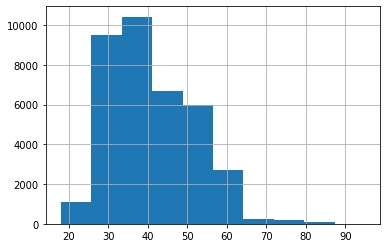

In [107]:
# Age
df_1['age'].hist()

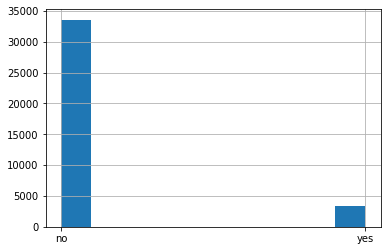

In [108]:
# Y variable
df_1['y'].hist()
plt.show()

The distribution of the Yes to the No in the Y variable is a bit concerning for our test. We will have to resample the no and maybe do some cross validation to bring this more to an even set.

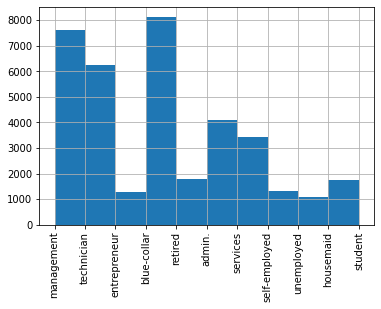

In [109]:
# Job
df_1['job'].hist()
plt.xticks(rotation=90)
plt.show()

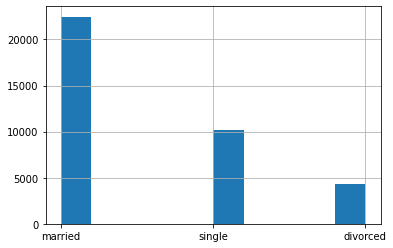

In [110]:
# Marital status
df_1['marital'].hist()
plt.show()

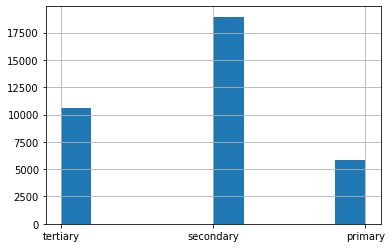

In [111]:
# Education
df_1['education'].hist()
plt.show()

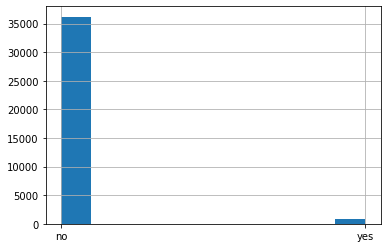

In [112]:
# Default
df_1['default'].hist()
plt.show()

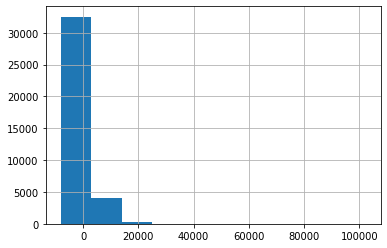

In [113]:
# Balance
df_1['balance'].hist()
plt.show()

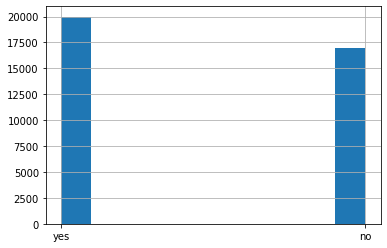

In [114]:
# Housing
df_1['housing'].hist()
plt.show()

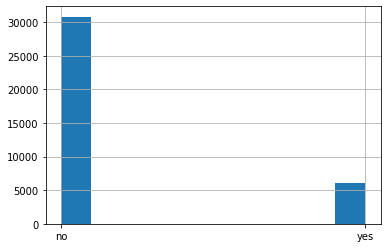

In [115]:
# Loan
df_1['loan'].hist()
plt.show()

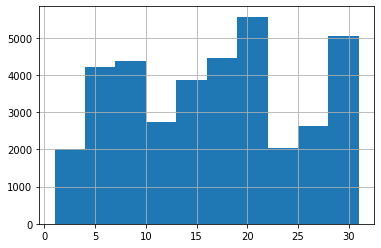

In [116]:
# Day
df_1['day'].hist()
plt.show()

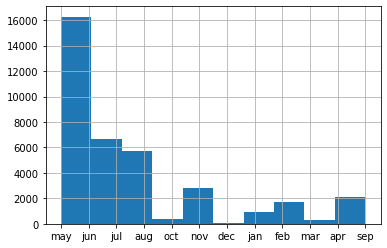

In [117]:
# Month
df_1['month'].hist()
plt.show()

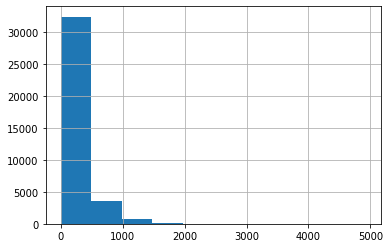

In [118]:
# Duration
df_1['duration'].hist()
plt.show()

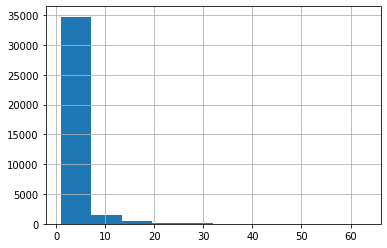

In [119]:
# Campaign
df_1['campaign'].hist()
plt.show()

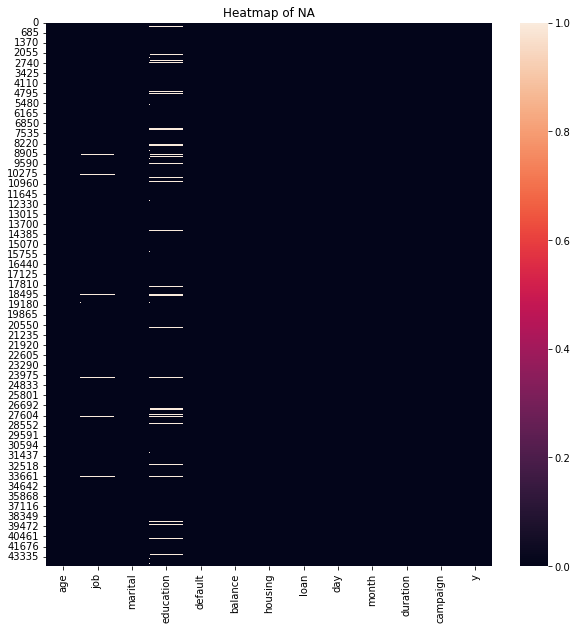

In [120]:
# Displaying the new NaNs on a heatmap, now that the columns have been removed
plt.figure(figsize=(10,10))
sns.heatmap(df_1.isna())
plt.title('Heatmap of NA')
plt.show()

# Data Preprocessing
## This is where I perform functions such as iumputing / dropping missing data,scaling features, mapping categorical labels, feature selection / extraction to select relevant features and reduce the dimensionality of the training examples. 
- The Extraction methods chosen for preprocessing data will depend on the ML algorithms intended to use, the state of the training examples collected

Yes. The extraction methods will be different for the different algorithms. This is why I have set up seperate functions for preprocessing and training modeling. That way I can select or create the preprocessing that I would like to conduct.

- A requirement of the project will be to address each category of data preprocessing stated above, describe the reasons for whether you used a given preprocessing technique or not

The data first starts with are either integers or objects. In the case of columns y, loan, and default. These were integer objects that were turned into category types with binary encoding. For the rest of the integers, I decided to use the minmaxscaler to help normalize the data a bit. For the Other objects I used one hot encoding to help relay the categorical element.

- At least Three of the features must require some form of data preprocessing

Everyone of the columns goes through a type of transformation, wether one hot encoding or minmax scaling

- Data cannot be "Turn-Key" for training

The Data is rather clean, but not completely turn key because we have to transform all of the categorical variables.

- NOTE regardless of wether the features can ultimately be reduced via feature selection techniques or not, it's a requirement that you perform feature selection analysis to determine the relative importance of each feature and decide which features should be included in the model

Some of the features where immedialely dropped from the vary beinging, such as Poutcome and contact. Though this can be said to be a standard selection. 
## TODO Make Sure to go through some feature selection analysis


- After preprocessing the data, check examples to ensure your training dataset is balanced

The data sets was definitely not balanced from the begining. It is for this reason that I decided to use Sklearns resampling to help go through and edit the different variables. 

- Remove examples with missing fields, or instances, could reulst in a training dataset that is unbalanced if one class label was more likely to be missing a particular feature.

Columns with too many missing fields were removed. Other columns that had missing fields just how those rows dropped.

-If you find yourself in the situation of having inbalanced dataset after preprocessing your data, consider alternative methods of preprocessing such as creating fake values or dropping the feature altogehr. These kinds of decisions are precisely what I want described in the write up inside the note book.

In [121]:
# Data Preprocessing Code
df_1.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
day           int64
month        object
duration      int64
campaign      int64
y            object
dtype: object

To look into running the different algorithms we need to set up a data pipeline. To do this I will use some of the libraries from sklearn

In [122]:
# Counting to see the sums
df_1.isnull().any().sum()

2

To start we will drop all the rows with the NaN values.

In [123]:
# Simple Drop of NaN rows
df_2 = df_1.dropna().copy()
df_2.isnull().any().sum()

0

Note that only two columns had any NaNs those rows have been removed and now we are working on a clean new data frame. df_2

There are three different columns that have two classiciations. These are default, housing, loan, and of course Y. We can turn all of theses in to binary.

In [124]:
# Changing three different columns into binary.
df_2['y'] = df_2.y.map(dict(yes=1, no=0))
df_2['default'] = df_2.default.map(dict(yes=1, no=0))
df_2['loan'] = df_2.loan.map(dict(yes=1, no=0))
df_2[['y','loan','default']].head()

,y,loan,default
0,0,0,0
1,0,0,0
2,0,1,0
5,0,0,0
6,0,1,0


Now that we have turn these columns in to binary. We might as well do the same for all the other categorical variabls. We will also change them into integers for good measure as well.

In [125]:
# Gathering the different columns that are objects
obj_cols = [col for col in df_2 if df_2[col].dtype == 'object']

# Transforming these columns in to categorical variables
for col in df_2.columns:
  if col in obj_cols:
    df_2[col] = df[col].astype('category')

df_2.dtypes

age             int64
job          category
marital      category
education    category
default         int64
balance         int64
housing      category
loan            int64
day             int64
month        category
duration        int64
campaign        int64
y               int64
dtype: object

In [126]:
df_2.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,y
0,58,management,married,tertiary,0,2143,yes,0,5,may,261,1,0
1,44,technician,single,secondary,0,29,yes,0,5,may,151,1,0
2,33,entrepreneur,married,secondary,0,2,yes,1,5,may,76,1,0
5,35,management,married,tertiary,0,231,yes,0,5,may,139,1,0
6,28,management,single,tertiary,0,447,yes,1,5,may,217,1,0


Now setting up a data pipeline to transform the data. Both the objects and the integers. Because I plan on doing a bit of feature selection down the line. I will set up a data pipline within a function that is aimed at preprocessing the data. This way if I performa forward of backward selection model it will be easier to edit through.

In [127]:
def transform_df(df):
  """This Function is set up to make it easy to transform the data if different
   columns are missing"""
  
  # Gathering Dummies for the 
  df_t = pd.get_dummies(data=df, columns=[col for col in df if df[col].dtype == 'category'])
  
  # Changing the binary fields into categories to be used in the models later
  df_t['y'] = df_t['y'].astype('category')
  df_t['loan'] = df_t['loan'].astype('category')
  df_t['default'] = df_t['default'].astype('category')

  # Scaling all the integer data with the MinMaxScaler()
  scaler = MinMaxScaler()
  s_cols = [col for col in df_t if df_t[col].dtype == 'int64']
  df_t[s_cols] = scaler.fit_transform(df_t[s_cols])

  return df_t

In [128]:
# Displaying what the newly transformed data looks like
df_3 = transform_df(df_2)
display(df_3.head())
display(df_3.dtypes)

,age,default,balance,loan,day,duration,campaign,y,job_admin.,job_blue-collar,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,0.519481,0,0.092259,0,0.133333,0.053070,0.0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0.337662,0,0.073067,0,0.133333,0.030704,0.0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0.194805,0,0.072822,1,0.133333,0.015453,0.0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5,0.220779,0,0.074901,0,0.133333,0.028264,0.0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6,0.129870,0,0.076862,1,0.133333,0.044124,0.0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


age                     float64
default                category
balance                 float64
loan                   category
day                     float64
duration                float64
campaign                float64
y                      category
job_admin.                uint8
job_blue-collar           uint8
job_entrepreneur          uint8
job_housemaid             uint8
job_management            uint8
job_retired               uint8
job_self-employed         uint8
job_services              uint8
job_student               uint8
job_technician            uint8
job_unemployed            uint8
marital_divorced          uint8
marital_married           uint8
marital_single            uint8
education_primary         uint8
education_secondary       uint8
education_tertiary        uint8
housing_no                uint8
housing_yes               uint8
month_apr                 uint8
month_aug                 uint8
month_dec                 uint8
month_feb                 uint8
month_ja

Now that we have a transforming method it is time to start looking at if we have
equally weight output labels. We do not. So therefore when we make the train and test sets this will have to be dealt with. The next steps are going to be aimed at evening out this training data set.  It will be interesting to see this get mixed in to the different model comparisons. 

In [129]:
# Showing the imbalance with the classification variable
display(df_3['y'].value_counts())

0    32059
1     3222
Name: y, dtype: int64

In [130]:
def train_data_w_resample(df):
  """This function is aimed at creating test train that has balanced classes"""
  df_maj = df[df['y'] == 0]
  df_min = df[df['y'] == 1]

  # Finding the number of samples that we need for a 50/50 Split
  sample_num = len(df_maj)

  df_min_upsample = resample(df_min, replace=True, n_samples=sample_num, 
                             random_state=42)

  df_unsampled = pd.concat([df_maj, df_min_upsample])

  return df_unsampled

In [131]:
def train_data(df):
  """This Function is set up to help make it easier to pass
  different datasets through for training. It also uses 
  resampling"""

  # Dividing up x and y
  X_all = df.loc[:, df.columns != 'y']
  Y_all = df.loc[:, df.columns == 'y']

  # creating a train and test set
  x_train, x_test, y_train, y_test = train_test_split(
      X_all, Y_all, test_size=0.2, random_state=42, stratify=Y_all, shuffle=True)
  
  # Back up line incase I need to turn y into an array
  # X_all, Y_all.values.ravel(), test_size=0.2, random_state=42, stratify=Y_all)
  
  return x_train, x_test, y_train, y_test

In [132]:
# Showing a test of training df_3
x_train_1, x_test_1, y_train_1, y_test_1 = train_data(df_3)
y_train_1.value_counts()

y
0    25646
1     2578
dtype: int64

In [133]:
# Sending off the x and y training samples to get resampled
df_train = pd.concat([x_train_1.reset_index(drop=True), y_train_1.reset_index(drop=True)], axis=1)
train_resampled = train_data_w_resample(df_train)

# Splitting the data back up in to the test and training sample for
# The models to be used later
x_train_re = train_resampled.loc[:, train_resampled.columns != 'y']
y_train_re = train_resampled.loc[:, train_resampled.columns == 'y']

In [134]:
# Showing how the data has now been resampled to create equal outputs
y_train_re.value_counts()

y
0    25646
1    25646
dtype: int64

## Feature Extraction to reduce the dimensionality of the training data set
Make sure to include some sort of feature analysis.

# Model Comparison

## This is where I will implement and compare the performance of at least three different classification algorithms to determine which model best fits the training and test data collected. 
- A description of the performance of each model (using an evaluation criteria such as classification accurcy) is required for this section as well as an overall decision as to which model is the best choiuce for the problem domain
-NOTE: the preceptron is not allowed to be one of the models you compare for this projec, as there are better algorithms available to you with similar functionality

## Model 1: Logistic Regression

In [135]:
# Model Code 1: Logistic Regression
logistic_eval = Pipeline(steps=[('classifier', LogisticRegression(solver='newton-cg', multi_class='multinomial'))])
logistic_eval.fit(x_train_re, y_train_re.values.ravel())

# Printing the accuracy of the test
display("Training score:", round(logistic_eval.score(x_train_re, y_train_re)*100,2))
display("Testing score:", round(logistic_eval.score(x_test_1, y_test_1)*100,2))

'Training score:'

83.07

'Testing score:'

83.73

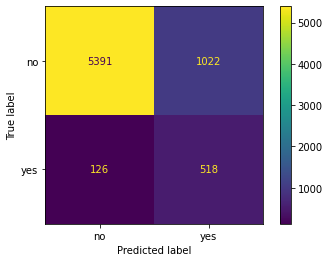

In [136]:
#  Creating Predictions for the logistic regression
y_logistic_pred = logistic_eval.predict(x_test_1)

# Creating a confusion matrix to look at different Scores
conf_matrix_log = confusion_matrix(y_test_1, y_logistic_pred)

# Displaying the Confusion Matrix
log_labels = ['no','yes']
ConfusionMatrixDisplay(conf_matrix_log, display_labels=log_labels).plot()
plt.show()

## Model 2: K-Nearest Neighbour


In [137]:
# Model Code 2: K-Nearest Neighbour
knn_classifier = KNeighborsClassifier(n_neighbors=2)
knn_classifier.fit(x_train_re, y_train_re.values.ravel())

# Printing the accuracy of the test
display("Training score:", round(knn_classifier.score(x_train_re, y_train_re)*100,2))
display("Testing score:", round(knn_classifier.score(x_test_1, y_test_1)*100,2))

'Training score:'

100.0

'Testing score:'

89.09

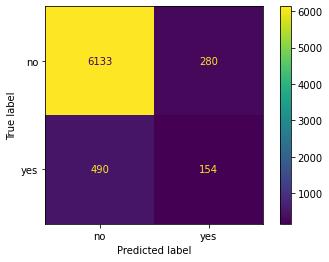

In [138]:
#  Creating Predictions for the logistic regression
y_knn_pred = knn_classifier.predict(x_test_1)

# Creating a confusion matrix to look at different Scores
conf_matrix_knn = confusion_matrix(y_test_1, y_knn_pred)

# Displaying the Confusion Matrix
log_labels = ['no','yes']
ConfusionMatrixDisplay(conf_matrix_knn, display_labels=log_labels).plot()
plt.show()

## Model 3: Decision Tree

In [139]:
# Model Code 3: Decision Tree
tree_model = DecisionTreeClassifier(criterion='gini', max_depth=6, random_state=42)
tree_model.fit(x_train_re, y_train_re)

# Printing the accuracy of the test
display("Training score:", round(tree_model.score(x_train_re, y_train_re)*100,2))
display("Testing score:", round(tree_model.score(x_test_1, y_test_1)*100,2))

'Training score:'

84.15

'Testing score:'

80.43

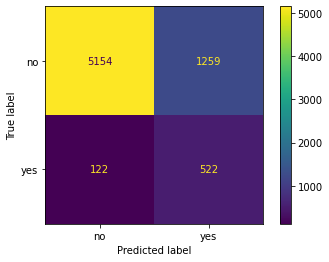

In [140]:
#  Creating Predictions for the logistic regression
y_tree_pred = tree_model.predict(x_test_1)

# Creating a confusion matrix to look at different Scores
conf_matrix_tree = confusion_matrix(y_test_1, y_tree_pred)

# Displaying the Confusion Matrix
log_labels = ['no','yes']
ConfusionMatrixDisplay(conf_matrix_tree, display_labels=log_labels).plot()
plt.show()

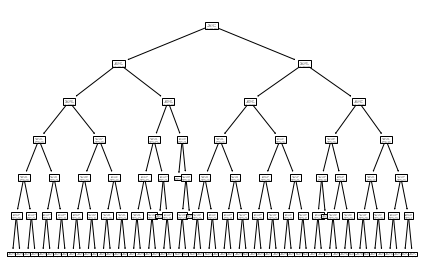

In [141]:
tree.plot_tree(tree_model)
plt.tight_layout()
plt.show()

# Experiment Summary


## This is where the results are sumarized for the experiment. 
- How did I have to collect data? How was the data preprocessed?
- What models where compared?
- Which Model performed the best
- Was I able to model the data accurately in the way I was hoping when I started the project?
- What did I learn during the process

During the process I learned that it is hard to choose data sets randomly. At first I also learned that it is interesting completing the preprocessing of data and trying to make training and test sets. By setting up functions I was able to do a bit of feature selection that really helped out. 

Getting the K-folds cross validation was interesting for setting up the different models as well. 

In [ ]:
# Experiment Summary Code